### Twin axes bar and line example - aligned axes of different scales

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
plt.style.use('bsestyle_light')

def format_yaxis_pct(ax):
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter('{0:.0%}'.format))

In [29]:
purchased_qty = [0.05, 0.12, 0.16, 0.15, 0.35, 0.17]
cvr = [0.05, 0.07, 0.09, 0.07, 0.06, 0.03]
ctr = [i + 0.02 for i in cvr]
rng = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']
df = pd.DataFrame({'purchased_qty':purchased_qty, 'cvr':cvr, 'ctr':ctr}, index=rng)
print df

        ctr   cvr  purchased_qty
20-30  0.07  0.05           0.05
30-40  0.09  0.07           0.12
40-50  0.11  0.09           0.16
50-60  0.09  0.07           0.15
60-70  0.08  0.06           0.35
70+    0.05  0.03           0.17


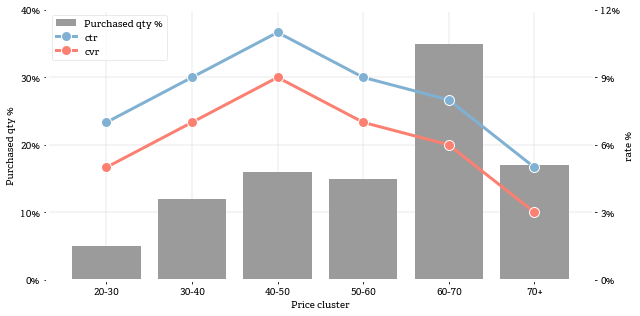

In [100]:
fig = plt.figure(figsize=(9,4.5))
ax = fig.add_subplot(1,1,1)

# Stock purchased share on ax1
N = len(df)
ind = np.arange(N)
vals = df['purchased_qty'].values.tolist()
ax.bar(ind, vals, label='Purchased qty %')
ax.set_ylabel('Purchased qty %')

# CTR, CVR metrics on ax2
ax2 = ax.twinx()
for metric, color in zip(['ctr', 'cvr'], ['#80b1d3', '#fb8072']):
    vals = df[metric].values.tolist()
    ax2.plot(ind, vals, color=color, linewidth=3, marker='o', markersize=10, markeredgecolor='w', label=metric)

# Formatting
ax2.set_xticks(ind)
ax2.set_xticklabels(df.index.tolist())
ax2.set_ylabel('rate %');
ax.set_xlabel('Price cluster')
ax2.grid(False)

# Combine legends from both axes
h, l = ax.get_legend_handles_labels()
h_, l_ = ax2.get_legend_handles_labels()
handles, labels = h + h_, l + l_
ax.legend(handles=handles, labels=labels)

# Ensure evenly spaced ticks so gridlines align between different scales
ax2.set_ylim(bottom=0, top=0.12)
ax.set_ylim(bottom=0, top=0.4)
for axis in [ax, ax2]:
    nticks=5
    axis.yaxis.set_major_locator(ticker.LinearLocator(nticks))
    format_yaxis_pct(axis)

plt.tight_layout()